In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras import layers, models, optimizers
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator

C:\Users\LENOVO\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
from keras.datasets import mnist

#### load and preprocess data

In [10]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [11]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [13]:
train_data = train_data.reshape((60000, 28, 28, 1)).astype('float32')
test_data = test_data.reshape((10000, 28, 28, 1)).astype('float32')

train_data /= 255
test_data /= 255

In [14]:
y_train = to_categorical(train_labels, num_classes=10)
y_test = to_categorical(test_labels, num_classes=10)

In [15]:
train_data.shape, test_data.shape, y_train.shape, y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10), (10000, 10))

In [16]:
x_val = train_data[:10000]
y_val = y_train[:10000]

x_train = train_data[10000:]
y_train = y_train[10000:]

x_train.shape, y_train.shape, x_val.shape, y_val.shape

((50000, 28, 28, 1), (50000, 10), (10000, 28, 28, 1), (10000, 10))

In [28]:
x_test = test_data

#### Build convolution nn and train on MNIST

In [17]:
model = models.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [18]:
hx = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val), verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 20s 391us/step - loss: 0.1966 - acc: 0.9372 - val_loss: 0.1070 - val_acc: 0.9707
Epoch 2/20
50000/50000 [==============================] - 14s 284us/step - loss: 0.0523 - acc: 0.9836 - val_loss: 0.0455 - val_acc: 0.9869
Epoch 3/20
50000/50000 [==============================] - 16s 324us/step - loss: 0.0352 - acc: 0.9890 - val_loss: 0.0412 - val_acc: 0.9876
Epoch 4/20
50000/50000 [==============================] - 14s 285us/step - loss: 0.0256 - acc: 0.9919 - val_loss: 0.0574 - val_acc: 0.9870
Epoch 5/20
50000/50000 [==============================] - 17s 331us/step - loss: 0.0209 - acc: 0.9936 - val_loss: 0.0554 - val_acc: 0.9857
Epoch 6/20
50000/50000 [==============================] - 15s 290us/step - loss: 0.0169 - acc: 0.9947 - val_loss: 0.0446 - val_acc: 0.9897
Epoch 7/20
50000/50000 [==============================] - 14s 286us/step - loss: 0.0131 - acc: 0.9961 - val_loss: 0.

In [20]:
hx.history.keys()

dict_keys(['acc', 'val_acc', 'val_loss', 'loss'])

In [21]:
tr_acc, tr_loss = hx.history['acc'], hx.history['loss']
val_acc, val_loss = hx.history['val_acc'], hx.history['val_loss']

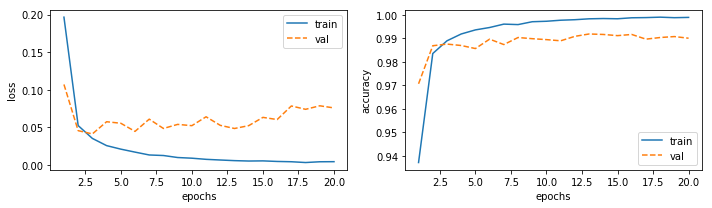

In [22]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3))

xs = range(1, len(tr_acc)+1)
ax[0].plot(xs, tr_loss, label='train')
ax[0].plot(xs, val_loss, '--', label='val')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')
ax[0].legend(loc='best')

ax[1].plot(xs, tr_acc, label='train')
ax[1].plot(xs, val_acc, '--', label='val')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
ax[1].legend(loc='best')

fig.tight_layout()

In [25]:
best_epoch = np.argmax(val_acc)

In [26]:
model = models.clone_model(model)
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.fit(np.concatenate((x_train, x_val)), np.concatenate((y_train, y_val)), epochs=best_epoch, batch_size=64)

Epoch 1/12
60000/60000 [==============================] - 16s 272us/step - loss: 0.1706 - acc: 0.9472
Epoch 2/12
60000/60000 [==============================] - 18s 294us/step - loss: 0.0467 - acc: 0.9857
Epoch 3/12
60000/60000 [==============================] - 17s 282us/step - loss: 0.0315 - acc: 0.9906
Epoch 4/12
60000/60000 [==============================] - 15s 248us/step - loss: 0.0241 - acc: 0.9922
Epoch 5/12
60000/60000 [==============================] - 16s 264us/step - loss: 0.0190 - acc: 0.9943
Epoch 6/12
60000/60000 [==============================] - 17s 290us/step - loss: 0.0155 - acc: 0.9955
Epoch 7/12
60000/60000 [==============================] - 15s 243us/step - loss: 0.0121 - acc: 0.9963
Epoch 8/12
60000/60000 [==============================] - 17s 278us/step - loss: 0.0112 - acc: 0.9965
Epoch 9/12
60000/60000 [==============================] - 15s 255us/step - loss: 0.0094 - acc: 0.9972
Epoch 10/12
60000/60000 [==============================] - 16s 269us/step - loss: 

In [29]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 226us/step


[0.04683106623161109, 0.9914]

### Training a convnet from scratch on a small data

* train[dog/cat] : [1000/1000]
* val[dog/cat] : [500/500]
* test[dog/cat] : [500/500]

In [6]:
import os, shutil

In [14]:
original_data_dir = '/Users/LENOVO/Desktop/data/dog_cat/train/'

In [7]:
base_dir = '/Users/LENOVO/Desktop/data/dog_cat/small_data'
os.mkdir(base_dir)

In [8]:
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)
val_dir = os.path.join(base_dir, 'val')
#os.mkdir(val_dir)
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

In [9]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
val_cats_dir = os.path.join(val_dir, 'cats')
val_dogs_dir = os.path.join(val_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [13]:
labels = ['cats', 'dogs']

In [15]:
os.listdir(original_data_dir)[:10]

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.10000.jpg',
 'cat.10001.jpg',
 'cat.10002.jpg',
 'cat.10003.jpg',
 'cat.10004.jpg']

In [27]:
for name, folder in zip(['training dog', 'training cat', 'validation dog', 
                         'validation cat', 'testing dog', 'testing cat'],
                        [train_dogs_dir, train_cats_dir, val_dogs_dir, val_cats_dir, test_dogs_dir, test_cats_dir]):
    print("total {} images: {}".format(name, len(os.listdir(folder))))

total training dog images: 1000
total training cat images: 1000
total validation dog images: 500
total validation cat images: 500
total testing dog images: 500
total testing cat images: 500


In [34]:
# build model
# conv-relu|max_pooling * 4
# dense [512]
# sigmoid

model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), 
                        padding='valid', activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), 
                        padding='valid', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), 
                        padding='valid', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), 
                        padding='valid', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# configuring the model for training
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['accuracy'])

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [36]:
# data preprocessing
from keras.preprocessing.image import ImageDataGenerator

In [37]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [38]:
train_generator = train_datagen.flow_from_directory(directory=train_dir, 
                                                    target_size=(150, 150), 
                                                    batch_size=20, 
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [39]:
val_generator = val_datagen.flow_from_directory(directory=val_dir,
                                               target_size=(150, 150),
                                               batch_size=20, class_mode='binary')

Found 1000 images belonging to 2 classes.


In [42]:
for img, label in train_generator:
    print("data batch shape: {}".format(img.shape))
    print("label batch shape: {}".format(label.shape))
    break

data batch shape: (20, 150, 150, 3)
label batch shape: (20,)


In [43]:
label[0]

0.0

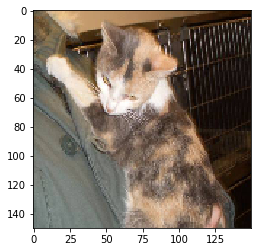

In [44]:
plt.imshow(img[0])

In [45]:
%time
history = model.fit_generator(train_generator, 
                              epochs=30, 
                              steps_per_epoch=100, 
                              validation_data=val_generator, 
                              validation_steps=50)

model.save('cats_and_dogs_small_1.h5')

Wall time: 0 ns
Epoch 1/30
100/100 [==============================] - 22s 224ms/step - loss: 0.6927 - acc: 0.5355 - val_loss: 0.6715 - val_acc: 0.6240
Epoch 2/30
100/100 [==============================] - 15s 152ms/step - loss: 0.6672 - acc: 0.5990 - val_loss: 0.6424 - val_acc: 0.6480
Epoch 3/30
100/100 [==============================] - 14s 138ms/step - loss: 0.6207 - acc: 0.6580 - val_loss: 0.6240 - val_acc: 0.6490
Epoch 4/30
100/100 [==============================] - 16s 162ms/step - loss: 0.5703 - acc: 0.6990 - val_loss: 0.6086 - val_acc: 0.6500
Epoch 5/30
100/100 [==============================] - 15s 153ms/step - loss: 0.5397 - acc: 0.7355 - val_loss: 0.5765 - val_acc: 0.6960
Epoch 6/30
100/100 [==============================] - 16s 155ms/step - loss: 0.5035 - acc: 0.7515 - val_loss: 0.6371 - val_acc: 0.6540
Epoch 7/30
100/100 [==============================] - 16s 159ms/step - loss: 0.4665 - acc: 0.7760 - val_loss: 0.5613 - val_acc: 0.6930
Epoch 8/30
100/100 [===================

In [46]:
history.history.keys()

dict_keys(['acc', 'val_loss', 'loss', 'val_acc'])

In [47]:
val_acc, val_loss = history.history['val_acc'], history.history['val_loss']
tr_acc, tr_loss = history.history['acc'], history.history['loss']

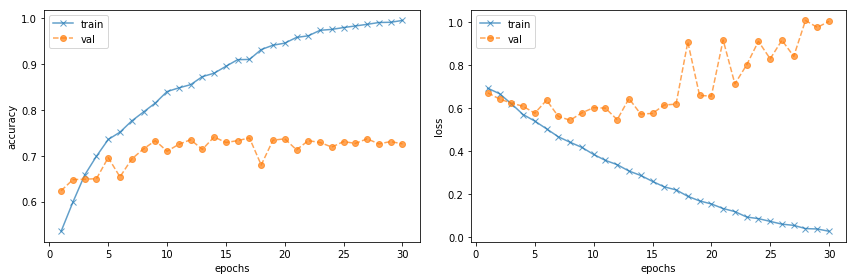

In [50]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

xs = range(1, len(tr_acc)+1)
ax[0].plot(xs, tr_acc, 'x-', label='train', alpha=.7)
ax[0].plot(xs, val_acc, 'o--', label='val', alpha=.7)
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('accuracy')
ax[0].legend(loc='best')

ax[1].plot(xs, tr_loss, 'x-', label='train', alpha=.7)
ax[1].plot(xs, val_loss, 'o--', label='val', alpha=.7)
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('loss')
ax[1].legend(loc='best')

fig.tight_layout()

#### Using data augmentation

In [51]:
datagen = ImageDataGenerator(rotation_range=40, 
                             width_shift_range=.2, 
                             height_shift_range=.2, 
                             shear_range=.2, 
                             zoom_range=.2,
                             horizontal_flip=True, 
                             fill_mode='nearest')

In [53]:
fnames = [os.path.join(train_cats_dir, file) for file in os.listdir(train_cats_dir)]

In [64]:
img = image.load_img(fnames[3], target_size=(150, 150))
x = image.img_to_array(img)[None, :, :, :]
x.shape

(1, 150, 150, 3)

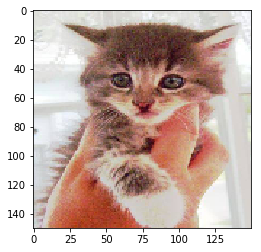

In [56]:
plt.imshow(img)

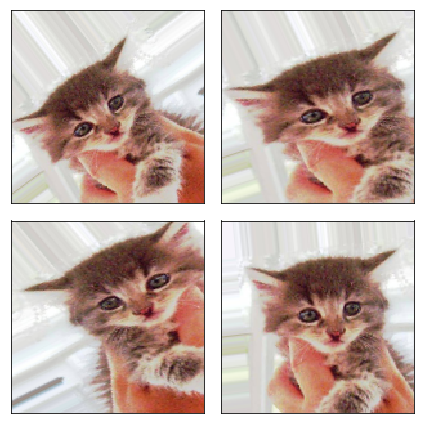

In [82]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(6, 6), 
                       subplot_kw={'xticks':[], 'yticks':[]})

for axi, im in zip(ax.flat, datagen.flow(x, batch_size=1)):
    
    axi.imshow(im[0]/255.)
    
fig.tight_layout()

In [96]:
model = models.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(3,3), 
                        padding='valid', activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=2))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), 
                        padding='valid', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=2))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), 
                        padding='valid', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=2))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), 
                        padding='valid', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=2))

model.add(layers.Flatten())
model.add(layers.Dropout(rate=.5))

model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

In [86]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [88]:
train_datagen = ImageDataGenerator(rotation_range=40, 
                                   width_shift_range=.2, 
                                   height_shift_range=.2, 
                                   shear_range=.2, 
                                   zoom_range=.2, 
                                   horizontal_flip=True, 
                                   rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [90]:
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(150, 150), 
                                                    class_mode='binary', 
                                                    batch_size=20)

test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(150, 150), 
                                                  class_mode='binary', 
                                                  batch_size=20)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [97]:
history = model.fit_generator(train_generator, steps_per_epoch=100, 
                              epochs=100, validation_data=val_generator, 
                              validation_steps=50)

Epoch 1/100
100/100 [==============================] - 39s 386ms/step - loss: 0.6893 - acc: 0.5220 - val_loss: 0.6812 - val_acc: 0.5300
Epoch 2/100
100/100 [==============================] - 35s 352ms/step - loss: 0.6739 - acc: 0.5710 - val_loss: 0.7158 - val_acc: 0.5230
Epoch 3/100
100/100 [==============================] - 19s 189ms/step - loss: 0.6630 - acc: 0.5995 - val_loss: 0.6723 - val_acc: 0.5720
Epoch 4/100
100/100 [==============================] - 16s 157ms/step - loss: 0.6580 - acc: 0.5910 - val_loss: 0.6375 - val_acc: 0.6320
Epoch 5/100
100/100 [==============================] - 16s 159ms/step - loss: 0.6392 - acc: 0.6165 - val_loss: 0.6459 - val_acc: 0.6240
Epoch 6/100
100/100 [==============================] - 16s 158ms/step - loss: 0.6271 - acc: 0.6490 - val_loss: 0.6263 - val_acc: 0.6520
Epoch 7/100
100/100 [==============================] - 16s 159ms/step - loss: 0.6121 - acc: 0.6420 - val_loss: 0.6665 - val_acc: 0.6320
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 18s 178ms/step - loss: 0.4290 - acc: 0.7980 - val_loss: 0.4323 - val_acc: 0.8080
Epoch 62/100
100/100 [==============================] - 17s 169ms/step - loss: 0.4289 - acc: 0.7950 - val_loss: 0.5170 - val_acc: 0.7650
Epoch 63/100
100/100 [==============================] - 19s 186ms/step - loss: 0.4293 - acc: 0.8045 - val_loss: 0.4613 - val_acc: 0.7990
Epoch 64/100
100/100 [==============================] - 17s 173ms/step - loss: 0.4339 - acc: 0.7975 - val_loss: 0.4437 - val_acc: 0.7910
Epoch 65/100
100/100 [==============================] - 17s 169ms/step - loss: 0.4316 - acc: 0.7975 - val_loss: 0.4302 - val_acc: 0.7960
Epoch 66/100
100/100 [==============================] - 17s 170ms/step - loss: 0.4192 - acc: 0.8125 - val_loss: 0.4163 - val_acc: 0.8210
Epoch 67/100
100/100 [==============================] - 17s 169ms/step - loss: 0.4215 - acc: 0.8095 - val_loss: 0.4519 - val_acc: 0.8030
Epoch 68/100
100/100 [===================

In [98]:
model.save('cats_and_dogs_small_2.h5')

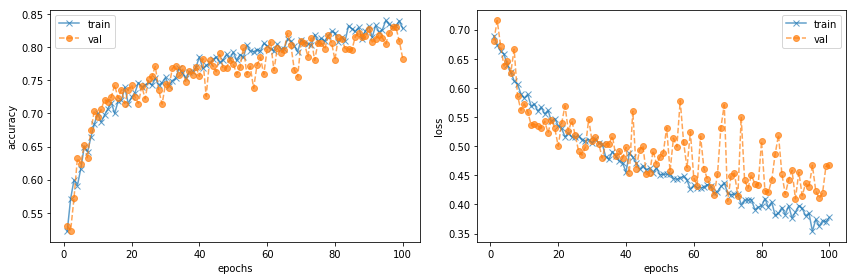

In [99]:
val_loss, val_acc = history.history['val_loss'], history.history['val_acc']
tr_loss, tr_acc = history.history['loss'], history.history['acc']

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

xs = range(1, len(tr_acc)+1)
ax[0].plot(xs, tr_acc, 'x-', label='train', alpha=.7)
ax[0].plot(xs, val_acc, 'o--', label='val', alpha=.7)
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('accuracy')
ax[0].legend(loc='best')

ax[1].plot(xs, tr_loss, 'x-', label='train', alpha=.7)
ax[1].plot(xs, val_loss, 'o--', label='val', alpha=.7)
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('loss')
ax[1].legend(loc='best')

fig.tight_layout()

#### Using a pretrained convnet: VGG16

In [8]:
import os

In [9]:
base_dir = '/Users/LENOVO/Desktop/data/dog_cat/small_data/'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [32]:
val_dir

'/Users/LENOVO/Desktop/data/dog_cat/small_data/val'

#### Fast Feature Extraction without data augmentation

In [6]:
# vgg16 model
conv_base = VGG16(include_top=False, 
                  weights='imagenet', 
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 65s 1us/step


In [7]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [15]:
# no data augmentation
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20


def extract_feature(directory, sample_size):
    features = np.zeros(shape=(sample_size, 4, 4, 512))
    labels = np.zeros(shape=(sample_size,))
    
    data_generator = datagen.flow_from_directory(directory, 
                                                 target_size=(150, 150), 
                                                 batch_size=batch_size, 
                                                 class_mode='binary')

    for i, (x_batch, y_batch) in enumerate(data_generator):
        a,b = i*batch_size, (i+1)*batch_size
        features[a:b] = conv_base.predict(x_batch)
        labels[a:b] = y_batch
        
        if b >= sample_size:
            break
    return features, labels

In [16]:
train_features, train_labels = extract_feature(train_dir, sample_size=2000)

Found 2000 images belonging to 2 classes.


In [17]:
val_features, val_labels = extract_feature(val_dir, sample_size=1000)
test_features, test_labels = extract_feature(test_dir, sample_size=1000)

Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
train_features = np.reshape(train_features, (len(train_features), -1))
val_features = np.reshape(val_features, (len(val_features), -1))
test_features = np.reshape(test_features, (len(test_features), -1))

In [20]:
train_features.shape, train_labels.shape, val_features.shape, val_labels.shape, test_features.shape, test_labels.shape

((2000, 8192), (2000,), (1000, 8192), (1000,), (1000, 8192), (1000,))

In [22]:
# create model

model = models.Sequential()
model.add(layers.Dense(units=256, activation='relu', input_dim=train_features.shape[1]))
model.add(layers.Dropout(rate=.5))
model.add(layers.Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(train_features, train_labels, 
                    batch_size=batch_size, epochs=30, 
                    validation_data=(val_features, val_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.4598 - acc: 0.7730 - val_loss: 0.3019 - val_acc: 0.8790
Epoch 2/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2900 - acc: 0.8760 - val_loss: 0.2641 - val_acc: 0.8990
Epoch 3/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2474 - acc: 0.9010 - val_loss: 0.2511 - val_acc: 0.9000
Epoch 4/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.2026 - acc: 0.9190 - val_loss: 0.2431 - val_acc: 0.9030
Epoch 5/30
2000/2000 [==============================] - 2s 976us/step - loss: 0.1769 - acc: 0.9325 - val_loss: 0.3691 - val_acc: 0.8490
Epoch 6/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.1579 - acc: 0.9395 - val_loss: 0.2936 - val_acc: 0.8830
Epoch 7/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.1446 - acc: 0.9465 - val_loss: 0.2478 - val_acc: 0.9000
Epoch 8/30
2

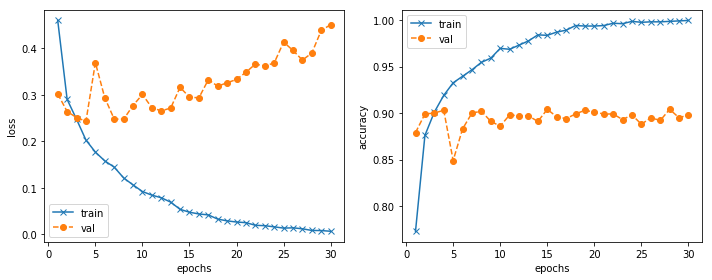

In [27]:
val_loss, val_acc = history.history['val_loss'], history.history['val_acc']
tr_loss, tr_acc = history.history['loss'], history.history['acc']

xs = range(1, len(tr_loss)+1)

fig, ax = plt.subplots(ncols=2, figsize=(10, 4))

ax[0].plot(xs, tr_loss, 'x-', label='train')
ax[0].plot(xs, val_loss, 'o--', label='val')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')
ax[0].legend(loc='best')

ax[1].plot(xs, tr_acc, 'x-', label='train')
ax[1].plot(xs, val_acc, 'o--', label='val')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
ax[1].legend(loc='best')

fig.tight_layout()

#### Feature extraction with data augmentation

In [3]:
def smooth_curve(points, factor=.8):
    results = points[:1]
    for val in points[1:]:
        results.append(factor*results[-1] + (1-factor)*val)
    return results

In [24]:
# freezing vgg16 layers
conv_base = VGG16(include_top=False, 
                  weights='imagenet', 
                  input_shape=(150, 150, 3))



In [27]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

In [29]:
conv_base.trainable = False

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [19]:
model.trainable_weights

[<tf.Variable 'dense_3/kernel:0' shape=(8192, 256) dtype=float32_ref>,
 <tf.Variable 'dense_3/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'dense_4/kernel:0' shape=(256, 1) dtype=float32_ref>,
 <tf.Variable 'dense_4/bias:0' shape=(1,) dtype=float32_ref>]

In [33]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=.2, 
                                   height_shift_range=.2, 
                                   shear_range=.2, 
                                   zoom_range=.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), 
                                                    batch_size=20, class_mode='binary')

val_generator = test_datagen.flow_from_directory(val_dir, target_size=(150, 150),
                                                 batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [34]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=2e-5), 
              metrics=['acc'])

In [35]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs=30, 
                              validation_data=val_generator, 
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 45s 451ms/step - loss: 0.5829 - acc: 0.7065 - val_loss: 0.4723 - val_acc: 0.7950
Epoch 2/30
100/100 [==============================] - 41s 413ms/step - loss: 0.4890 - acc: 0.7775 - val_loss: 0.3780 - val_acc: 0.8620
Epoch 3/30
100/100 [==============================] - 41s 414ms/step - loss: 0.4307 - acc: 0.8135 - val_loss: 0.3429 - val_acc: 0.8690
Epoch 4/30
100/100 [==============================] - 42s 418ms/step - loss: 0.4154 - acc: 0.8175 - val_loss: 0.3162 - val_acc: 0.8760
Epoch 5/30
100/100 [==============================] - 42s 418ms/step - loss: 0.4021 - acc: 0.8260 - val_loss: 0.3031 - val_acc: 0.8670
Epoch 6/30
100/100 [==============================] - 42s 416ms/step - loss: 0.3771 - acc: 0.8350 - val_loss: 0.2956 - val_acc: 0.8720
Epoch 7/30
100/100 [==============================] - 42s 417ms/step - loss: 0.3645 - acc: 0.8470 - val_loss: 0.2960 - val_acc: 0.8730
Epoch 8/30
100/100 [==============================] - 4

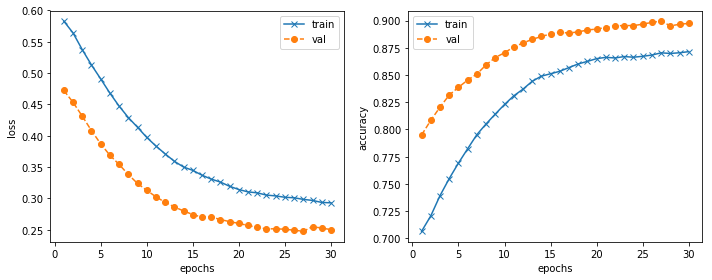

In [37]:
val_loss, val_acc = history.history['val_loss'], history.history['val_acc']
tr_loss, tr_acc = history.history['loss'], history.history['acc']

xs = range(1, len(tr_loss)+1)

fig, ax = plt.subplots(ncols=2, figsize=(10, 4))

ax[0].plot(xs, smooth_curve(tr_loss), 'x-', label='train')
ax[0].plot(xs, smooth_curve(val_loss), 'o--', label='val')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')
ax[0].legend(loc='best')

ax[1].plot(xs, smooth_curve(tr_acc), 'x-', label='train')
ax[1].plot(xs, smooth_curve(val_acc), 'o--', label='val')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
ax[1].legend(loc='best')

fig.tight_layout()

### Fine-tuning
* Add your custom network on top of an already-trained base network
* Freeze the base network
* Train the part you added
* Unfreeze some layers in the base network
* Jointly train both these layers and the part you added

In [82]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    #print(layer.name)
    layer.trainable = False

input_4
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool


In [83]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [84]:
conv_base.trainable_weights

[<tf.Variable 'block5_conv1_3/kernel:0' shape=(3, 3, 512, 512) dtype=float32_ref>,
 <tf.Variable 'block5_conv1_3/bias:0' shape=(512,) dtype=float32_ref>,
 <tf.Variable 'block5_conv2_3/kernel:0' shape=(3, 3, 512, 512) dtype=float32_ref>,
 <tf.Variable 'block5_conv2_3/bias:0' shape=(512,) dtype=float32_ref>,
 <tf.Variable 'block5_conv3_3/kernel:0' shape=(3, 3, 512, 512) dtype=float32_ref>,
 <tf.Variable 'block5_conv3_3/bias:0' shape=(512,) dtype=float32_ref>]